In [2]:
from Bio import Entrez

import pandas as pd
import seaborn as sns
import numpy as np


In [3]:
filepath = "results/dREhomologs_MR20230620.csv"
results_df = pd.read_csv(filepath)

thisdata = results_df[['Scientific Name','gene','ToLdiv']].drop_duplicates()
temp = thisdata['Scientific Name'].value_counts().reset_index()

temp = temp.loc[temp['count'] >= 15]
temp

,Scientific Name,count
0,Homo sapiens,55
1,Nannospalax galili,55
2,Bufo bufo,55
3,Rana temporaria,55
4,Lipotes vexillifer,55
...,...,...
1425,Bursaphelenchus okinawaensis,15
1426,Aphelenchoides besseyi,15
1427,Operophtera brumata,15
1428,Taenia asiatica,15


In [79]:
Entrez.email = "Michael.Reitman@arcadiascience.com"
Entrez.sleep_between_tries = 5

species_list = temp[["Scientific Name"]].values.tolist()

In [80]:
## search SRA records for long-read datasets
record_counts = {}
for species in species_list:
    
    #search SRA
    search_term  = species[0] + '''[Organism]
    AND (genomic[Source] OR genomic single cell[Source])
    AND (oxford nanopore[Platform] OR pacbio smrt[Platform]) 
    '''
    handle = Entrez.esearch(db="sra", retmax=10, term=search_term)# idtype="acc")

    #search Bioproject
    # search_term  = species[0] + '''[Organism]
    # AND genome sequencing[Filter]
    # ''' # AND (scope multiisolate[Filter] OR scope multispecies[Filter])

    # handle = Entrez.esearch(db="bioproject", retmax=10, term=search_term)# idtype="acc")

    record = Entrez.read(handle)
    handle.close()
    record_counts.update({species[0]: int(record.get("Count"))})


[Text(0.5, 0, '# of dre homologs'), Text(0, 0.5, '# of long-read SRA entries')]

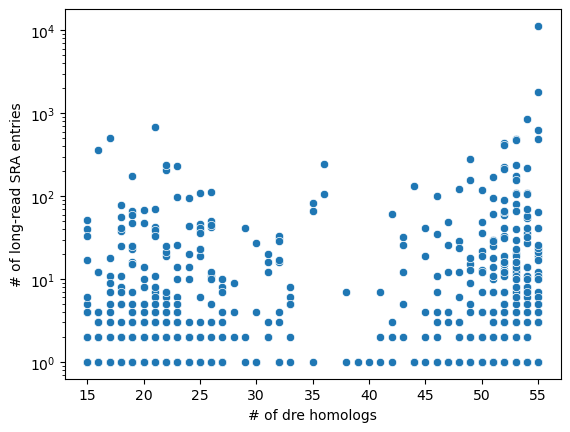

In [82]:
temp["nrecords"] = list(record_counts.values())

g= sns.scatterplot( data=temp,
                   x= "count",
                   y="nrecords",
                   )
g.set(yscale='log')
g.set(xlabel='# of dre homologs', ylabel= '# of long-read SRA entries')

In [90]:
spcssortbynrecs = temp.sort_values("nrecords", ascending=False)

print(spcssortbynrecs[0::5])

                Scientific Name  count  nrecords
0                  Homo sapiens     55     11344
1341                Bombyx mori     17       509
305          Tursiops truncatus     52       418
187           Carassius auratus     53       235
1094              Aedes aegypti     22       206
...                         ...    ...       ...
667         Apaloderma vittatum     41         0
672   Daphoenositta chrysoptera     41         0
680      Pelecanoides urinatrix     41         0
685       Cephalopterus ornatus     41         0
690          Amazona guildingii     41         0

[286 rows x 3 columns]


In [74]:
test = results_df.dropna()

test = test[test["Scientific Name"].str.contains("Bombyx mori")]
test = test[["Scientific Name", "gene"]].drop_duplicates().reset_index(drop=True)
test

,Scientific Name,gene
0,Bombyx mori,GLS
1,Bombyx mori,PABPN1
2,Bombyx mori,CNBP
3,Bombyx mori,NOTCH2NLC
4,Bombyx mori,RFC1
5,Bombyx mori,JPH3
6,Bombyx mori,DMD
7,Bombyx mori,NOP56
8,Bombyx mori,MARCHF6
9,Bombyx mori,COMP


In [5]:
#drop unnamed column
results_df = results_df.loc[:, ~results_df.columns.str.contains('^Unnamed')]

In [8]:
results_df.drop_duplicates()

,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession,gene,ToLdiv
0,"frataxin, mitochondrial isoform 1 preproprotei...",Homo sapiens,human,9606.0,431.0,431.0,100.0,2.000000e-152,100.00,210.0,NP_000135.2,FXN,Primates
1,FXN [synthetic construct],synthetic construct,NaN,32630.0,429.0,429.0,100.0,2.000000e-151,99.52,210.0,AKI71332.1,FXN,Synthetic
2,FXN [synthetic construct],synthetic construct,NaN,32630.0,427.0,427.0,100.0,6.000000e-151,99.52,210.0,AKI71333.1,FXN,Synthetic
3,frataxin [Homo sapiens],Homo sapiens,human,9606.0,426.0,426.0,100.0,2.000000e-150,99.05,210.0,AAA98508.1,FXN,Primates
4,"frataxin, mitochondrial isoform X1 [Pan troglo...",Pan troglodytes,chimpanzee,9598.0,423.0,423.0,100.0,4.000000e-149,98.57,210.0,XP_016816418.1,FXN,Primates
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262857,unnamed protein product [Trichobilharzia regenti],Trichobilharzia regenti,NaN,157069.0,124.0,124.0,55.0,1.000000e-29,38.50,244.0,VDQ09066.1,GIPC1,Invertebrates
262858,hypothetical protein TSAR_003650 [Trichomalops...,Trichomalopsis sarcophagae,NaN,543379.0,121.0,121.0,78.0,6.000000e-28,33.94,281.0,OXU17379.1,GIPC1,Invertebrates
262859,PDZ domain-containing protein GIPC1-like [Fols...,Folsomia candida,NaN,158441.0,116.0,116.0,51.0,3.000000e-27,39.77,180.0,XP_021953350.1,GIPC1,Invertebrates
262860,unnamed protein product [Heligmosomoides polyg...,Heligmosomoides polygyrus,NaN,6339.0,103.0,103.0,52.0,3.000000e-22,32.61,186.0,VDO29859.1,GIPC1,Invertebrates
